In [ ]:
# SOCIAL MEDIA USAGE ANALYSIS - DATA PREPROCESSING & EDA

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("social_media_usage_data.csv")

In [6]:
# -----------------------------
# 1. DATA CLEANING
# -----------------------------

# Display first few rows
print("Initial Dataset Preview:")
print(df.head())

Initial Dataset Preview:
        Name  Age  Gender  Instagram  YouTube  WhatsApp  Snapchat  Facebook  \
0  Student_1   24  Female        142      221        48        14         1   
1  Student_2   21  Female        170       41        16        53        34   
2  Student_3   22    Male         28       98        43        59        86   
3  Student_4   24  Female         35        6        91         7        80   
4  Student_5   20    Male         12      143        29        52        89   

  Most_Used_Platform        Purpose  
0           Facebook      Education  
1          Instagram      Education  
2           Facebook    Socializing  
3           Snapchat   Productivity  
4           Snapchat  Entertainment  


In [8]:
# Check for missing values
df.loc[np.random.choice(df.index, 5), 'Instagram'] = np.nan
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
Name                  0
Age                   0
Gender                0
Instagram             5
YouTube               0
WhatsApp              0
Snapchat              0
Facebook              0
Most_Used_Platform    0
Purpose               0
dtype: int64


In [10]:
# (Optional) Introduce some NaNs for demonstration/testing (if needed)
df.loc[np.random.choice(df.index, 5), 'Instagram'] = np.nan

# Fill missing values (if any) with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Confirm no missing values remain
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Name                  0
Age                   0
Gender                0
Instagram             0
YouTube               0
WhatsApp              0
Snapchat              0
Facebook              0
Most_Used_Platform    0
Purpose               0
Total_Time            0
dtype: int64


In [12]:
# -----------------------------
# 2. FEATURE ENGINEERING
# -----------------------------

# Create a new feature: Total Time Spent on Social Media
df['Total_Time'] = df[['Instagram', 'YouTube', 'WhatsApp', 'Snapchat', 'Facebook']].sum(axis=1)

In [13]:
# -----------------------------
# 3. HANDLING OUTLIERS
# -----------------------------

# Use IQR to detect and remove outliers from 'Total_Time'
Q1 = df['Total_Time'].quantile(0.25)
Q3 = df['Total_Time'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Total_Time'] >= lower) & (df['Total_Time'] <= upper)]

In [15]:
# -----------------------------
# 4. SUMMARY STATISTICS
# -----------------------------

print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Age   Instagram     YouTube    WhatsApp    Snapchat    Facebook  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    21.210000  101.115000  119.980000   58.410000   41.430000   49.970000   
std      1.913773   45.190721   66.586009   32.963431   25.876261   30.711251   
min     18.000000    1.000000    1.000000    1.000000    0.000000    1.000000   
25%     19.750000   67.750000   57.500000   31.000000   17.500000   22.000000   
50%     21.000000  109.500000  127.000000   56.500000   42.500000   50.000000   
75%     23.000000  129.250000  165.750000   89.500000   61.250000   77.750000   
max     24.000000  179.000000  237.000000  118.000000   89.000000   99.000000   

       Total_Time  
count  100.000000  
mean   370.905000  
std     96.942259  
min    167.000000  
25%    301.750000  
50%    361.250000  
75%    443.750000  
max    585.000000  


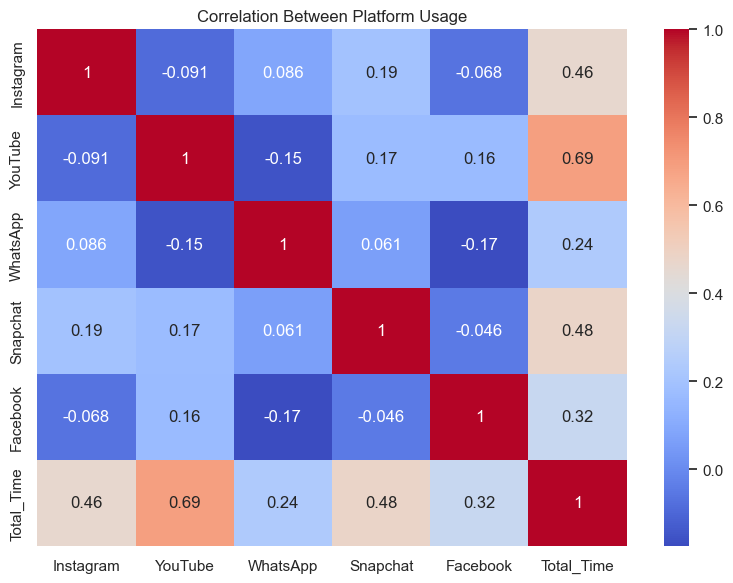

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df[platform_cols + ['Total_Time']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Platform Usage")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()


C:\Users\msi1\AppData\Local\Temp\ipykernel_19840\1583164247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_times.index, y=avg_times.values, palette="coolwarm")


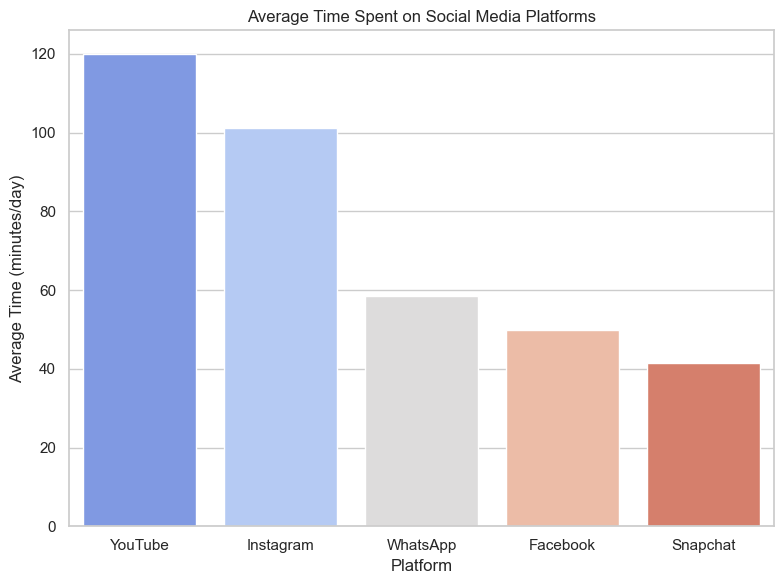

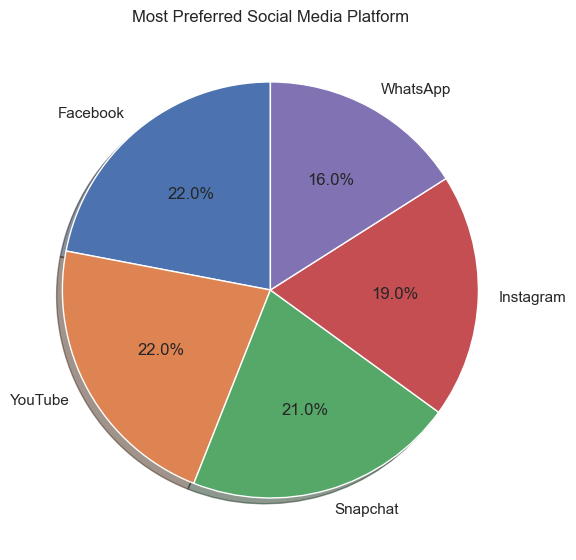

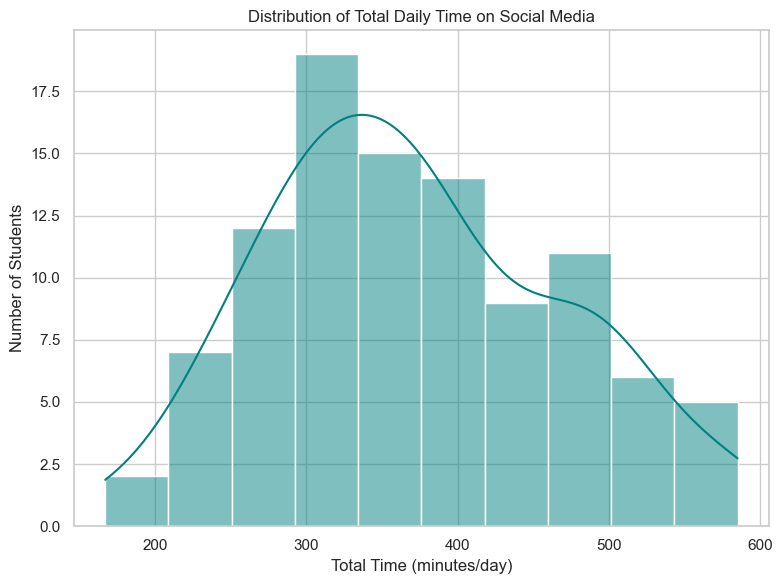

C:\Users\msi1\AppData\Local\Temp\ipykernel_19840\1583164247.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Purpose', order=df['Purpose'].value_counts().index, palette='pastel')


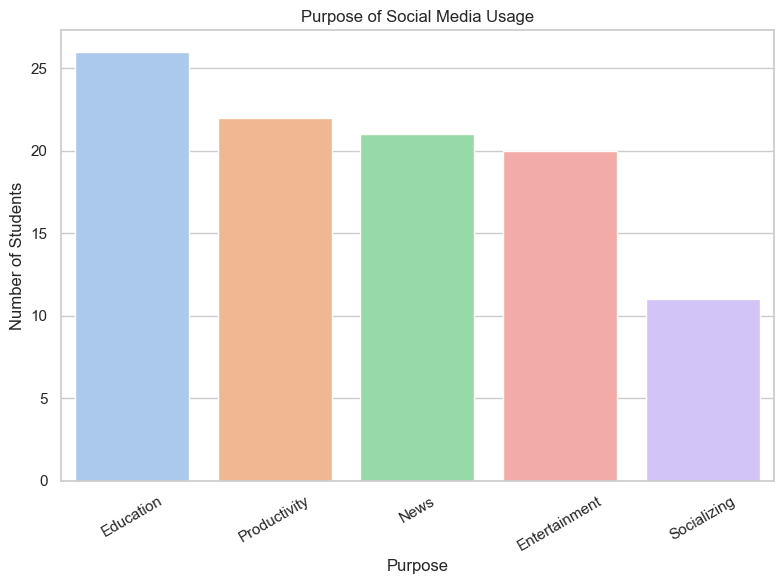

In [16]:
# -----------------------------
# 5. VISUALIZATIONS
# -----------------------------

# Bar Plot: Average Time Spent on Each Platform
platform_cols = ['Instagram', 'YouTube', 'WhatsApp', 'Snapchat', 'Facebook']
avg_times = df[platform_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_times.index, y=avg_times.values, palette="coolwarm")
plt.title("Average Time Spent on Social Media Platforms")
plt.ylabel("Average Time (minutes/day)")
plt.xlabel("Platform")
plt.tight_layout()
plt.savefig("avg_time_per_platform.png")
plt.show()

# Pie Chart: Most Preferred Platform
plt.figure(figsize=(6, 6))
df['Most_Used_Platform'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Most Preferred Social Media Platform")
plt.ylabel('')
plt.tight_layout()
plt.savefig("most_preferred_platform.png")
plt.show()

# Histogram: Distribution of Total Time Spent
plt.figure(figsize=(8, 6))
sns.histplot(df['Total_Time'], bins=10, kde=True, color='teal')
plt.title("Distribution of Total Daily Time on Social Media")
plt.xlabel("Total Time (minutes/day)")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.savefig("total_time_distribution.png")
plt.show()

# Bar Chart: Purpose of Social Media Usage
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Purpose', order=df['Purpose'].value_counts().index, palette='pastel')
plt.title("Purpose of Social Media Usage")
plt.xlabel("Purpose")
plt.ylabel("Number of Students")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("purpose_distribution.png")
plt.show()

In [ ]:
# -----------------------------
# 6. SAVE CLEANED DATA
# -----------------------------

df.to_csv("social_media_usage_data_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'social_media_usage_data_cleaned.csv'")



Cleaned dataset saved as 'social_media_usage_data_cleaned.csv'
